# Schelling Segregation Model

## Background

The Schelling (1971) segregation model is a classic of agent-based modeling, demonstrating how agents following simple rules lead to the emergence of qualitatively different macro-level outcomes. Agents are randomly placed on a grid. There are two types of agents, one constituting the majority and the other the minority. All agents want a certain number (generally, 3) of their 8 surrounding neighbors to be of the same type in order for them to be happy. Unhappy agents will move to a random available grid space. While individual agents do not have a preference for a segregated outcome (e.g. they would be happy with 3 similar neighbors and 5 different ones), the aggregate outcome is nevertheless heavily segregated.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from model import Schelling

Now we instantiate a model instance: a 20x20 grid, with an 80% chance of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 3 similar neighbors.

In [2]:
model = Schelling(width=20, height=20, density=0.8, minority_pc=0.2, homophily=3)

Running Mesa INES's Model...


We want to run the model until all the agents are happy with where they are. However, there's no guarantee that a given model instantiation will *ever* settle down. So let's run it for either 100 steps or until it stops on its own, whichever comes first:

In [3]:
while model.running and model.schedule.steps < 100:
    model.step()
print("Steps run:" + str(model.schedule.steps))

Steps run:100


The model has a DataCollector object, which checks and stores how many agents are happy at the end of each step. It can also generate a pandas DataFrame of the data it has collected:

In [4]:
model_out = model.datacollector.get_model_vars_dataframe()

Finally, we can plot the 'happy' series:

<AxesSubplot:>

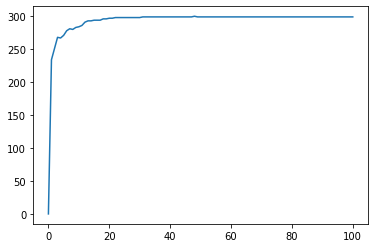

In [5]:
model_out.happy.plot()

For testing purposes, here is a table giving each agent's x and y values at each step.

# Effect of Homophily on segregation

Now, we can do a parameter sweep to see how segregation changes with homophily.

First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [6]:
from mesa.batchrunner import BatchRunner

In [7]:
def get_segregation(model):
    """
    Find the % of agents that only have neighbors of their same type.
    """
    segregated_agents = 0
    for agent in model.schedule.agents:
        segregated = True
        for neighbor in model.grid.iter_neighbors(agent.pos, True):
            if neighbor.type != agent.type:
                segregated = False
                break
        if segregated:
            segregated_agents += 1
    return segregated_agents / model.schedule.get_agent_count()

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [8]:
params = {"height": 10, "width": 10, "density": 0.8, "minority_pc": 0.2, "homophily": range(1, 9)}


In [9]:
model_reporters = {"Segregated_Agents": get_segregation}

In [10]:
from mesa.batchrunner import batch_run
param_sweep = batch_run(
    Schelling,
    parameters=params,
    max_steps=200,
)

0it [00:00, ?it/s]

Running Mesa INES's Model...
Running Mesa INES's Model...
Running Mesa INES's Model...


3it [00:00, 11.98it/s]

Running Mesa INES's Model...


5it [00:00,  6.85it/s]

Running Mesa INES's Model...
Running Mesa INES's Model...


6it [00:00,  5.97it/s]

Running Mesa INES's Model...


7it [00:01,  4.53it/s]

Running Mesa INES's Model...


8it [00:01,  5.14it/s]


In [11]:
import pandas as pd
df = pd.DataFrame(param_sweep)

In [12]:
df

,RunId,iteration,Step,height,width,density,minority_pc,homophily,happy,Segregated_Agents,AgentID,x,y
0,0,-1,3,10,10,0.8,0.2,1,75,0.441558,"(0, 0)",3,9
1,0,-1,3,10,10,0.8,0.2,1,75,0.441558,"(0, 1)",0,8
2,0,-1,3,10,10,0.8,0.2,1,75,0.441558,"(0, 3)",6,7
3,0,-1,3,10,10,0.8,0.2,1,75,0.441558,"(0, 4)",1,3
4,0,-1,3,10,10,0.8,0.2,1,75,0.441558,"(0, 5)",5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,7,-1,200,10,10,0.8,0.2,8,1,0.324324,"(9, 3)",7,9
619,7,-1,200,10,10,0.8,0.2,8,1,0.324324,"(9, 4)",6,0
620,7,-1,200,10,10,0.8,0.2,8,1,0.324324,"(9, 5)",2,6
621,7,-1,200,10,10,0.8,0.2,8,1,0.324324,"(9, 6)",2,5


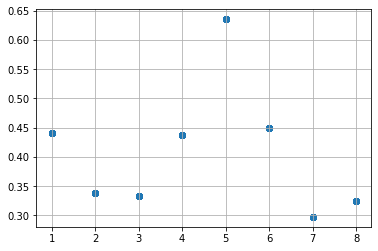

In [13]:
plt.scatter(df['homophily'], df['Segregated_Agents'])
plt.grid(True)